In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
import pickle

In [102]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 124.9/124.9 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Collection

In [4]:
Churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
Churn[Churn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
Churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
Churn.shape

(7043, 21)

In [10]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
Churn["TotalCharges"]=Churn["TotalCharges"].replace(' ',"0").astype(float)

In [19]:
Churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [21]:
Churn.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Data preocessing 

In [23]:
Churn.drop("customerID",axis=1,inplace=True)

In [24]:
Churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

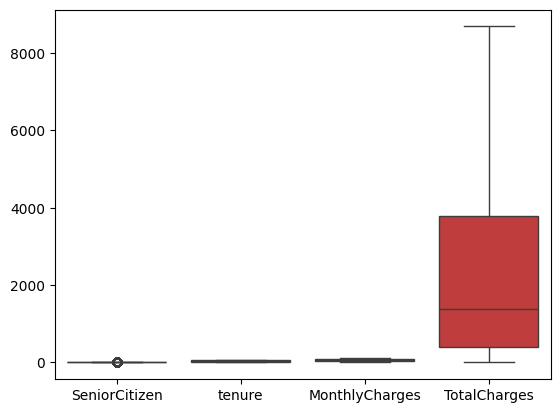

In [25]:
sns.boxplot(Churn)

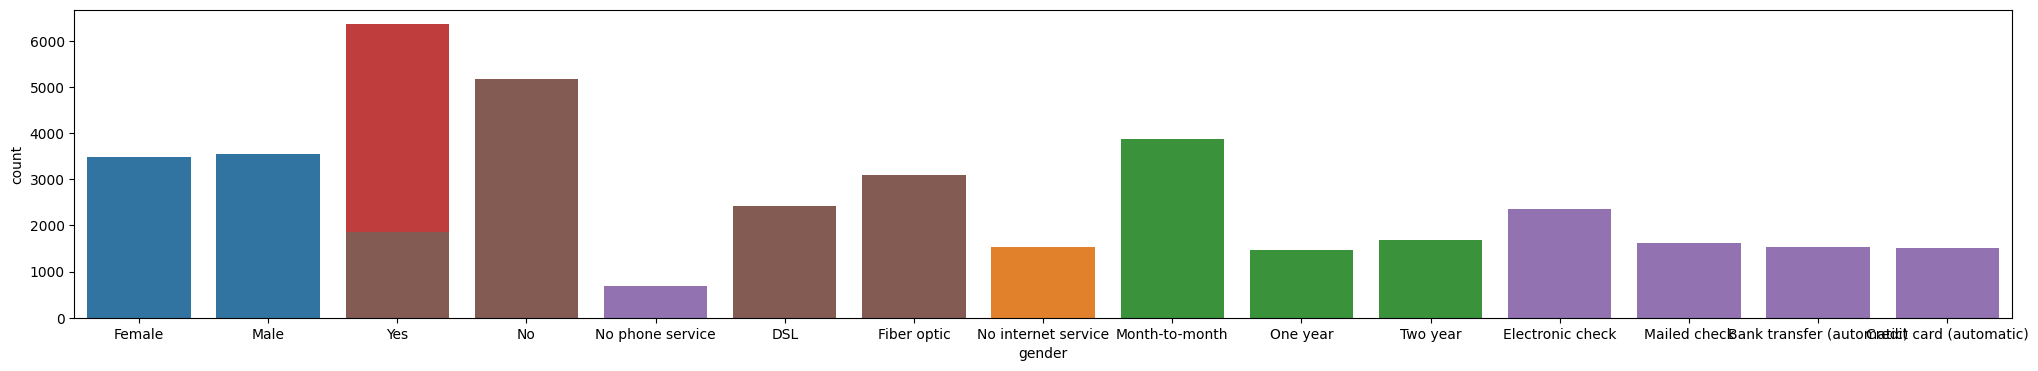

In [33]:
plt.figure(figsize=(25,4))
for i in Churn.columns:
    if Churn[i].dtypes=="object":
        sns.countplot(x=Churn[i])

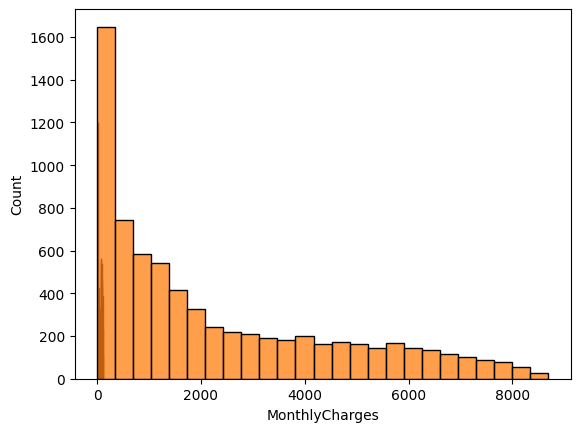

In [37]:
for i in Churn.columns:
    if Churn[i].dtypes in [int , float]:
        sns.histplot(Churn[i])

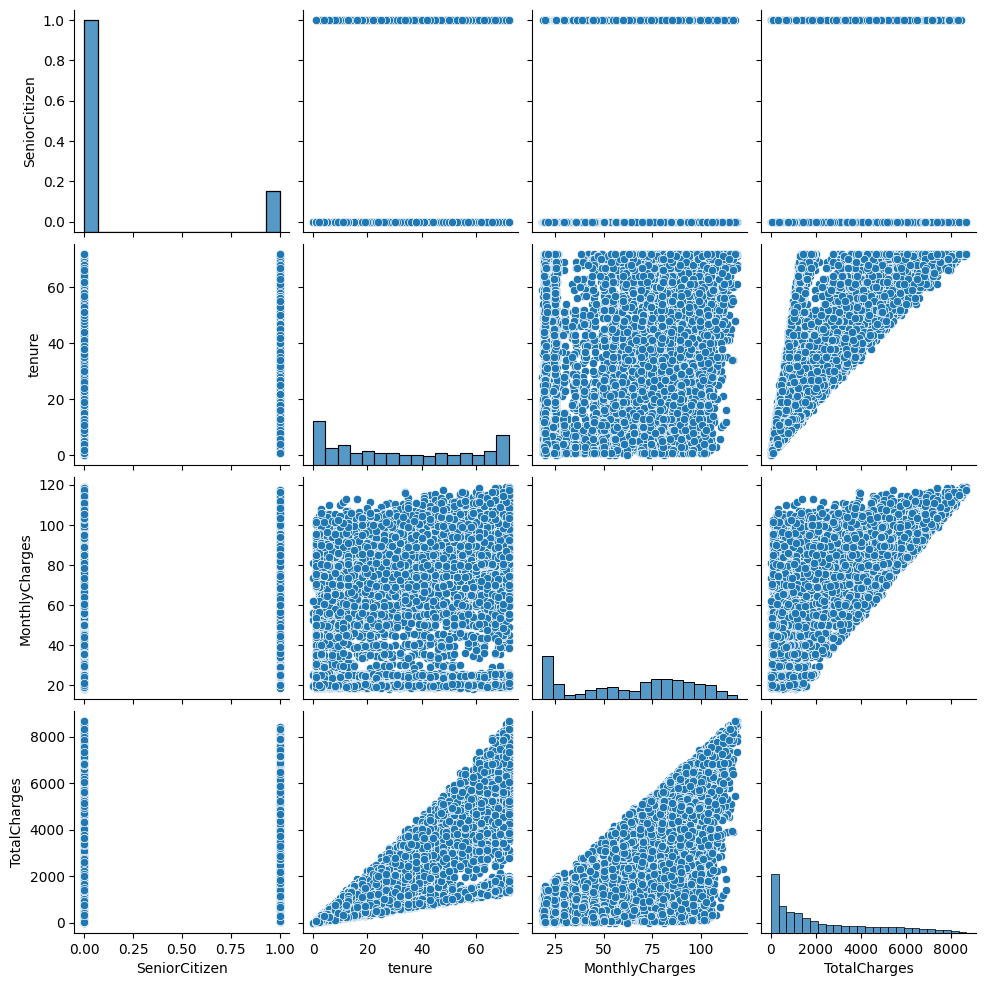

In [38]:
sns.pairplot(Churn)

In [40]:
Churn["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [41]:
pd.crosstab(Churn["Churn"],Churn["gender"])

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [42]:
pd.crosstab(Churn["Churn"],Churn["Partner"])

Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


In [69]:
pd.crosstab(Churn["Churn"],Churn["PhoneService"])

PhoneService,0,1
Churn,,
0,512,4662
1,170,1699


In [43]:
LE =  LabelEncoder()

In [45]:
for i in Churn.columns:
    if Churn[i].dtypes=="object":
        Churn[i]= LE.fit_transform(Churn[i])

In [47]:
Churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [64]:
Churn.groupby("Churn").agg({'gender':"mean",'Partner':"mean", 'Dependents':"mean",'PhoneService':"mean",'PaperlessBilling':"mean","tenure":"mean","MonthlyCharges":"mean","TotalCharges":"mean"})

,gender,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
Churn,,,,,,,,
0,0.507344,0.528218,0.344801,0.901044,0.535562,37.569965,61.265124,2549.911442
1,0.497592,0.357945,0.174425,0.909042,0.749064,17.979133,74.441332,1531.796094


In [70]:
Churn.drop(["gender","PhoneService"],axis=1,inplace=True)

<Axes: >

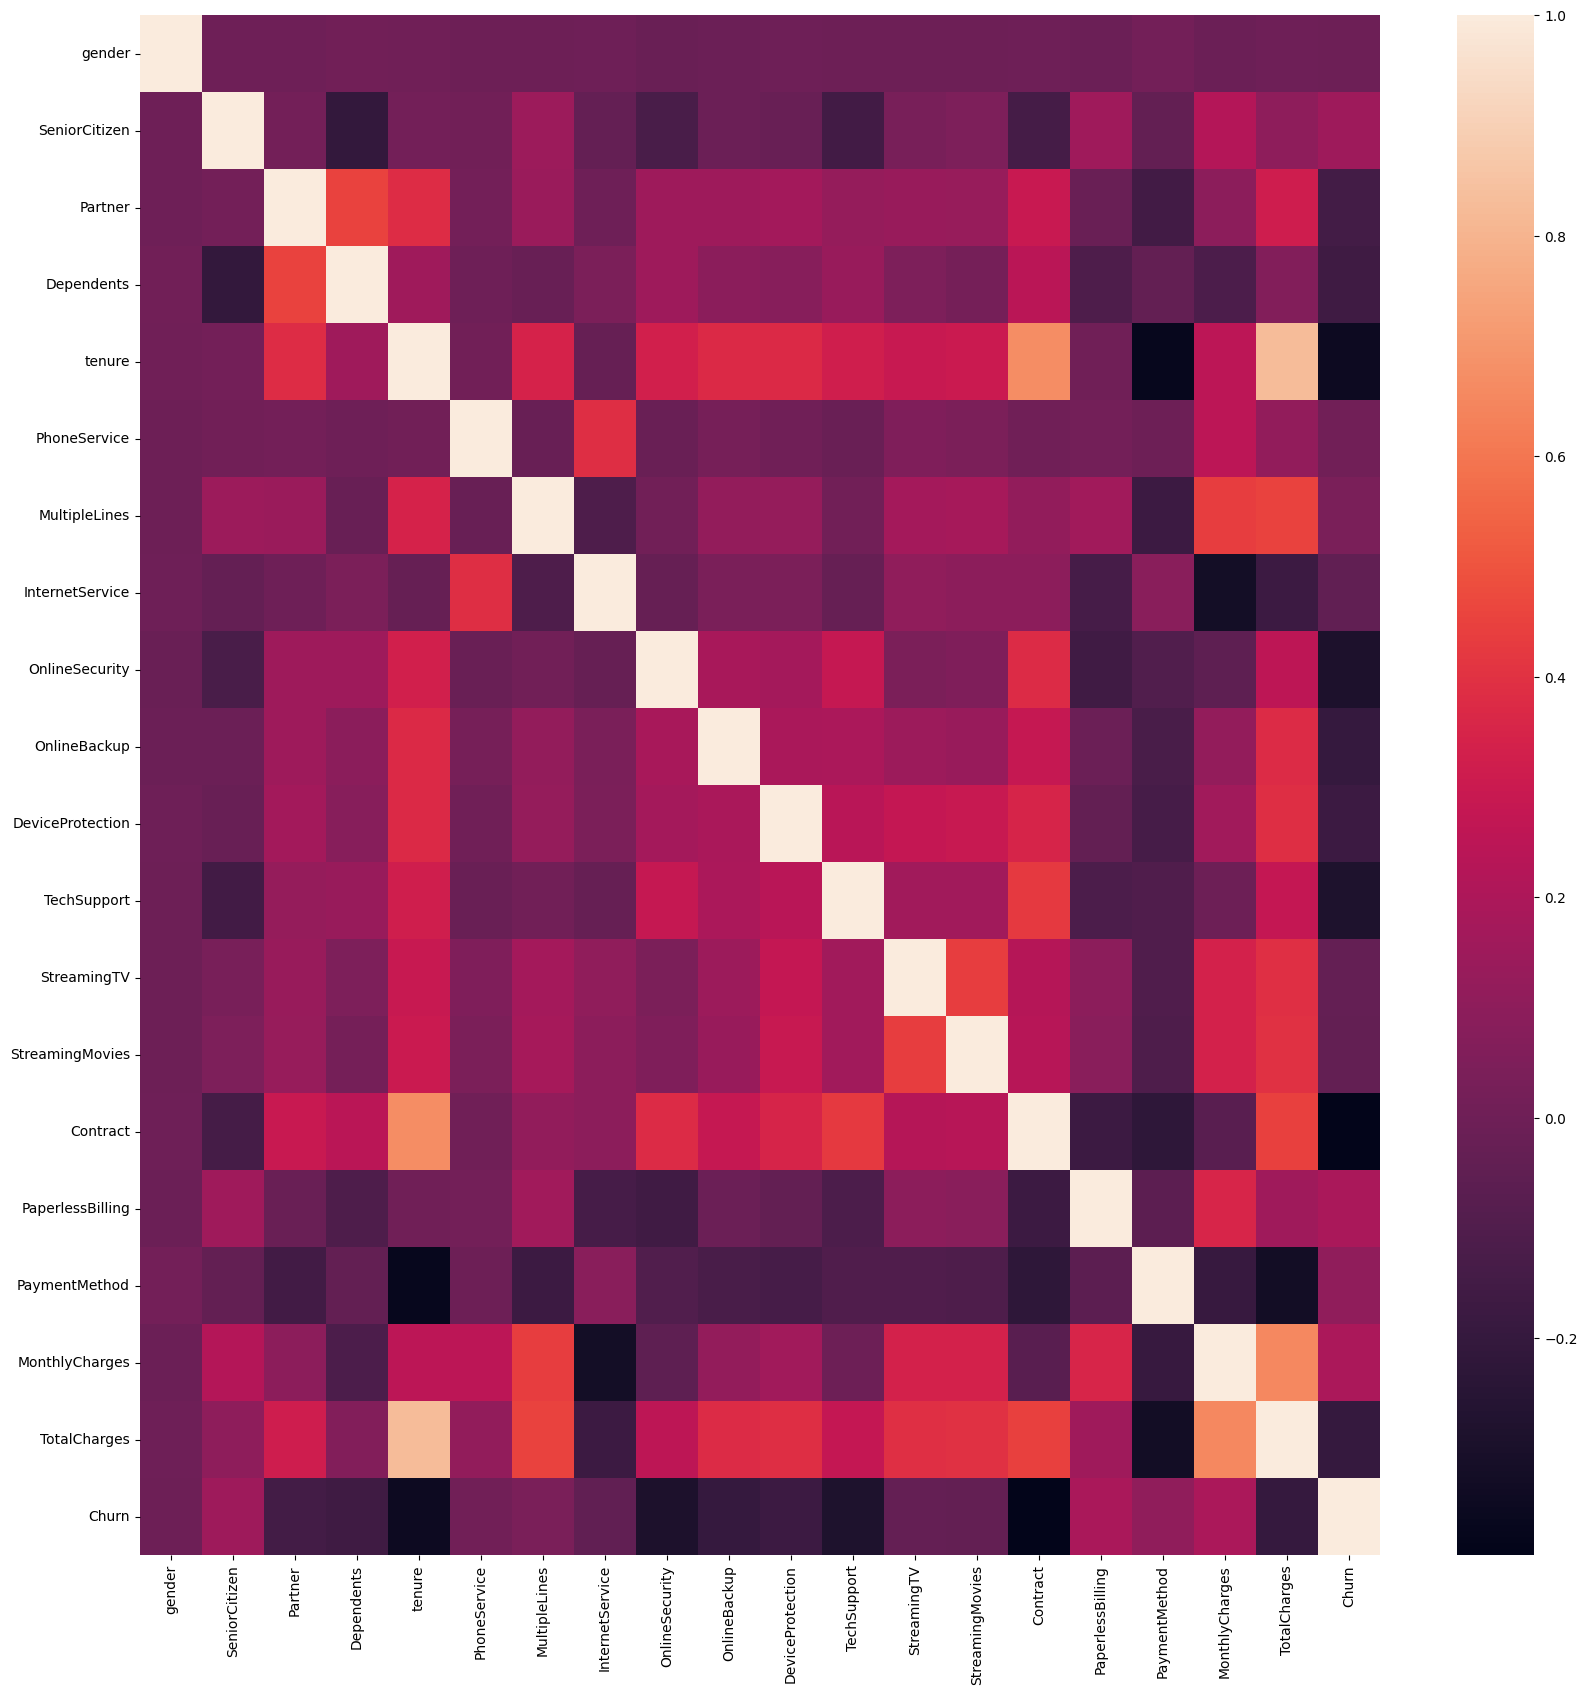

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(Churn.corr())

In [65]:
SS=StandardScaler()

In [67]:
for i in Churn.columns :
    if i in ["MonthlyCharges","TotalCharges","tenure"]:
        Churn[i]=SS.fit_transform(Churn[[i]])

In [71]:
Churn

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,-1.277445,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,0,0,0,0.066327,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,0,0,0,-1.236724,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,0,0,0,0.514251,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,-1.236724,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.127605,0
7039,0,1,1,1.613701,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.242606,0
7040,0,1,1,-0.870241,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.852932,0
7041,1,1,0,-1.155283,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.870513,1


In [76]:
Churn["Avg_Tenure_Charges"]= Churn["MonthlyCharges"]/Churn["tenure"]

In [79]:
x=Churn.drop("Churn",axis=1)

In [81]:
y=Churn.Churn

# Model Development 

In [83]:
x_train,x_test, y_train, y_test =train_test_split(x,y,random_state=0,test_size=0.2)

In [86]:
x_train.shape

(5634, 18)

In [87]:
x_test.shape

(1409, 18)

In [88]:
1409/(5634+1409)

0.20005679397983814

In [90]:
RFR= RandomForestClassifier()

In [91]:
RFR.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
pred=RFR.predict(x_test)

In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [124]:
xg_clf=xgb.XGBClassifier(n_estimators=100,
                 learning_rate=0.15,
                 max_depth=2,
                 random_state=42)

In [125]:
xg_clf.fit(x_train,y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [126]:
pred=xg_clf.predict(x_test)

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.62      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [130]:
with open('model.pkl','wb') as file:
    pickle.dump(xg_clf,file)